### 🔬 Code Demo: Limited-Memory Multisecant Quasi-Newton Methods

This notebook is part of the codebase accompanying the paper:

**“Advancing Multi-Secant Quasi-Newton Methods for General Convex Functions”**  
*Mokhwa Lee and Yifan Sun, Journal of Optimization Theory and Applications (JOTA), 2024.*

---

This demo illustrates the **numerical behavior** of limited-memory multisecant quasi-Newton (MS-QN) methods, focusing on:

- Comparing **Gradient Descent (GD)** to **limited-memory MS-BFGS**.
- Visualizing optimization dynamics on a **synthetic logistic regression problem**.
- Highlighting the role of **multisecant updates**, **diagonal perturbation**, and **rejection strategies** for stability and convergence.

Key components:
- `data.py`: Generates synthetic datasets with configurable difficulty.
- `models.py`: Defines a small feedforward neural network.
- `bfgs.py`: Implements single- and multi-secant QN methods, including inverse updates and limited-memory variants.
- This notebook: Trains the model using GD and MS-BFGS, and visualizes loss, gradient norm, and misclassification.

This code demonstrates how multisecant methods can outperform classical optimizers in **ill-conditioned, non-quadratic** problems — even when memory is limited.

In [1]:
import torch
import torch.nn as nn


import matplotlib.pyplot as plt
import copy

from data import *
from bfgs import *
from models import *

In [2]:
input_size = 10
batch_size = 100 

# Create synthetic dataset with specified properties
inputs, targets = get_data(2*batch_size, input_size, sigma=.1, eig_range=0, prob_difficulty='low', seed = 42)

# Split into training and testing sets
train_data = inputs[:batch_size]
test_data = inputs[batch_size:]
train_targets = targets[:batch_size]
test_targets = targets[batch_size:]
        



In [3]:
hidden_sizes = [10,10] 

# Initialize base model
model_0 = SimpleNN(input_size, hidden_sizes)
model_0.criterion = nn.BCEWithLogitsLoss()
  

Training Progress: 100%|██████████| 10000/10000 [00:09<00:00, 1071.33it/s]


Text(0.5, 1.05, 'Gradient Descent')

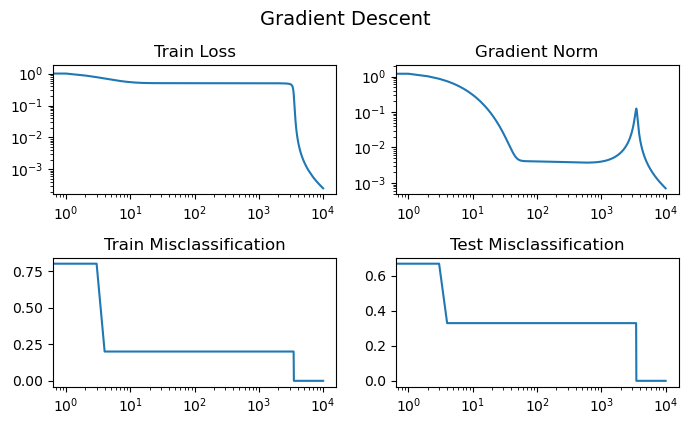

In [4]:
# Basic gradient descent class
class GradDescOptim():
    def __init__(self): pass  
    def update_fn(self, x, g): return g

# Set hyperparameters
num_epochs = 10000
learning_rate = 0.1

# Train with gradient descent
model = copy.deepcopy(model_0)
optim = GradDescOptim()

_, loss, gradnorm, misclass, test_misclass = train_model(
    train_data, train_targets,
    test_data, test_targets,
    model, optim, learning_rate, num_epochs
)

# Plot results
fig, axs = plt.subplots(2, 2, figsize=(7, 4))
axs[0, 0].loglog(loss)
axs[0, 0].set_title("Train Loss")

axs[0, 1].loglog(gradnorm)
axs[0, 1].set_title("Gradient Norm")

axs[1, 0].semilogx(misclass)
axs[1, 0].set_title("Train Misclassification")

axs[1, 1].semilogx(test_misclass)
axs[1, 1].set_title("Test Misclassification")

plt.tight_layout()
plt.suptitle("Gradient Descent", y=1.05, fontsize=14)




In [ ]:
# Multisecant BFGS configuration
p = 5                      # Number of secant pairs to store
L = 1                      # Limited memory size
reject_tol = 0.1           # Inner product rejection tolerance
scale = False              # Use μ-scaling
gamma = 0.1                # Initial inverse Hessian estimate
learning_rate = 1e-5
num_epochs = 10000
Btype = 'vanilla'          # Options: 'vanilla', 'symm', 'diagupdate' (our method)

# Train with limited-memory multisecant BFGS
model = copy.deepcopy(model_0)
optim = LMSBFGSOptim(model.num_params, p=p, L=L, secant_type='curve',
                     Btype=Btype, reject_type='inner', reject_tol=reject_tol,
                     scale=scale, gamma=gamma)

_, loss, gradnorm, misclass, test_misclass = train_model(
    train_data, train_targets,
    test_data, test_targets,
    model, optim, learning_rate, num_epochs
)

# Plot results

fig, axs = plt.subplots(2, 2, figsize=(7, 4))
axs[0, 0].loglog(loss)
axs[0, 0].set_title("Train Loss")

axs[0, 1].loglog(gradnorm)
axs[0, 1].set_title("Gradient Norm")

axs[1, 0].semilogx(misclass)
axs[1, 0].set_title("Train Misclassification")

axs[1, 1].semilogx(test_misclass)
axs[1, 1].set_title("Test Misclassification")

plt.tight_layout()
plt.suptitle(f"Multisecant BFGS ({Btype})", y=1.05, fontsize=14)




Training Progress:  45%|████▌     | 4531/10000 [00:08<00:09, 561.79it/s]